# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [63]:
data = pd.read_csv("assignment3_creditcard.csv")

In [64]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


### 데이터 분리

In [65]:
X = data.drop(["Class"],axis=1)
y = data["Class"]

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## logistic regression

#### 로지스틱 회귀
회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0과 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류하는 알고리즘

$p(X) = \frac{1}{1+e^{-f(x)}} = \frac{1}{1+e^{- (w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n)}} = \frac{1}{1+e^{-Z}}  $  
$(Z=XW)$

#### parameters

**penalty**
- 일반적인 logistic : penalty=None
- 릿지 logistic : penalty="l2"
- 라쏘 logistic : penalty="l1"
- 병합 logistic : penalty="elasticnet"

**solver**
- ‘lbfgs’ - [‘l2’, None]
- ‘liblinear’ - [‘l1’, ‘l2’]
- ‘newton-cg’ - [‘l2’, None]
- ‘newton-cholesky’ - [‘l2’, None]
- ‘sag’ - [‘l2’, None]
- ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

**C**   
alpha의 역수(높은 C ; 낮은 강도의 제약조건 / 낮은 C ; 높은 강도의 제약조건)

In [67]:
from sklearn.linear_model import LogisticRegression

logitS = LogisticRegression(penalty=None)
logitS.fit(X_train, y_train)

y_pred = logitS.predict(X_test)

In [68]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 성능지표

|CM|예측 negative|예측 positive|
|:---:|:---:|:---:|
|실제 negative|TN|FP|
|실제 positive|FN|TP|

**정확도 accuracy**  전체 데이터 중 실제 맞힌 데이터 수    
= (TP + TN) / (TP + TN + EP + FN)

**정밀도 precision** positive로 예측한 것 중 실제 positive의 비율   
= TP / (TP + FP)

**재현율 recall** 실제 positive 중 positive로 예측한 것의 비율   
= TP / (TP + FN)

**F1-score** 재현율과 정밀도가 동시에 높아야 예측력이 좋은 분류 모델이므로 둘의 조화평균을 구한 값   
= (2*정밀도*재현율) / (정밀도 + 재현율)

In [69]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8535    2]
 [  10   57]]


In [70]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(8535, 2, 10, 57)

In [71]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

precision = metrics.precision_score(y_test, y_pred)
print("정밀도:", precision)

recall = metrics.recall_score(y_test, y_pred)
print("재현율:", recall)

f1 = metrics.f1_score(y_test, y_pred)
print("f1 점수:", f1)

정확도: 0.99860529986053
정밀도: 0.9661016949152542
재현율: 0.8507462686567164
f1 점수: 0.9047619047619047


위의 4가지 성능 지표에서는 성능이 좋은 것으로 나타남.    
주어진 데이터는 클래스 분포가 불균형하기 때문에 성능을 높이는 데 사용하는 지표로 F1 score를 사용하겠음

### 성능 높이기

#### 1. undersampling

<Axes: xlabel='Class', ylabel='count'>

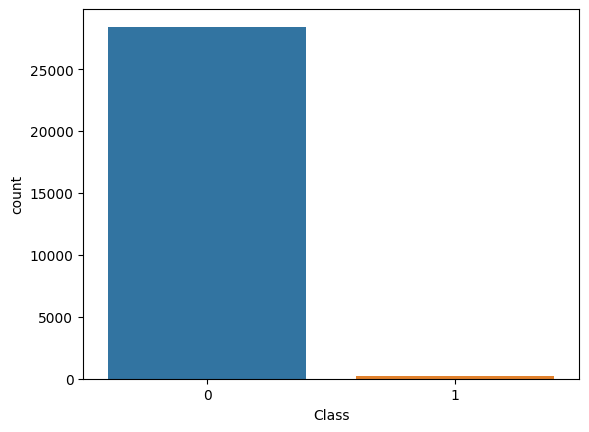

In [72]:
sns.countplot(x=data['Class'])

In [73]:
data['Class'].value_counts()

0    28432
1      246
Name: Class, dtype: int64

class의 불균형이 매우 크므로 oversampling 또는 undersampling 필요    
class == 0 인 데이터를 undersampling 진행

In [74]:
# 무작위undersampling
from imblearn.under_sampling import *
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_resample(X, y)

In [75]:
y_samp.value_counts()

0    246
1    246
Name: Class, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.3, random_state=100)

In [77]:
from sklearn.linear_model import LogisticRegression

logitS = LogisticRegression(penalty=None)
logitS.fit(X_train, y_train)

y_pred = logitS.predict(X_test)

In [78]:
f1 = metrics.f1_score(y_test, y_pred)
print("f1 점수:", f1)

f1 점수: 0.9178082191780821


#### 2. oversampling

In [80]:
from imblearn.over_sampling import SMOTE
# SMOTE 인스턴스 생성
oversampling_instance = SMOTE(k_neighbors=3)

# 오버샘플링 적용
X_samp, y_samp =oversampling_instance.fit_resample(X, y)

In [84]:
y_samp.value_counts()

0    28432
1    28432
Name: Class, dtype: int64

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.3, random_state=100)

In [86]:
from sklearn.linear_model import LogisticRegression

logitS = LogisticRegression(penalty=None)
logitS.fit(X_train, y_train)

y_pred = logitS.predict(X_test)

f1 = metrics.f1_score(y_test, y_pred)
print("f1 점수:", f1)

f1 점수: 0.9566771944460998


undersampling 보다 smote oversampling을 했을 때 f1-score가 높아진 것을 알 수 있음

#### 3. penalty 변경

일반적인 로지스틱 회귀(penalty=None) 일때와 릿지, 라쏘, 엘라스틱넷으로 변경했을 때의 성능지표 비교

In [87]:
# 릿지
from sklearn.linear_model import LogisticRegression

logitS = LogisticRegression(penalty="l2")
logitS.fit(X_train, y_train)

y_pred = logitS.predict(X_test)

f1 = metrics.f1_score(y_test, y_pred)
print("f1 점수:", f1)

f1 점수: 0.9565476545270312


In [89]:
# 라쏘
from sklearn.linear_model import LogisticRegression

logitS = LogisticRegression(penalty="l1")
logitS.fit(X_train, y_train)

y_pred = logitS.predict(X_test)

f1 = metrics.f1_score(y_test, y_pred)
print("f1 점수:", f1)

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

오류 원인) parameter인 Solver는 default가 ‘lbfgs’인데, 이는 'l2'와 'none'만 지원.   
해결을 위해 Solver 변경

In [90]:
# 라쏘
from sklearn.linear_model import LogisticRegression

logitS = LogisticRegression(solver='saga',penalty="l1")
logitS.fit(X_train, y_train)

y_pred = logitS.predict(X_test)

f1 = metrics.f1_score(y_test, y_pred)
print("f1 점수:", f1)

f1 점수: 0.9561686372865161


회귀에 penalty를 주는 것에는 성능에 큰 차이가 없음.   

#### 최종모형

smote oversampling을 한 일반적인 로지스틱 회귀모형